In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dc_bike_share = pd.read_csv('CBS_2021-2023_Full.csv', sep=',')

/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_61548/2747284438.py:6: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dc_bike_share = pd.read_csv('CBS_2021-2023_Full.csv', sep=',')


In [89]:
dc_bike_share_new = dc_bike_share.copy()

In [90]:
dc_bike_share_new

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member
10693993,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual
10693995,D2DB18DB58BC83D2,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,38.909394,-77.048728,casual


In [91]:
unique_values_before = dc_bike_share_new.nunique()
print("Unique values before conversion:\n", unique_values_before, '\n')

Unique values before conversion:
 ride_id               10693997
rideable_type                3
started_at             9649173
ended_at               9638365
start_station_name         860
start_station_id          1891
end_station_name           865
end_station_id            1904
start_lat               570110
start_lng               617671
end_lat                 173835
end_lng                 183886
member_casual                2
dtype: int64 



In [92]:
# Check Memory usage before converting
memory_usage = dc_bike_share_new.memory_usage(deep=True)
print("Memory Usage before Converting dtypes:\n", memory_usage, '\n')

Memory Usage before Converting dtypes:
 Index                       132
ride_id               695109805
rideable_type         654238494
started_at            727191796
ended_at              727191796
start_station_name    740478725
start_station_id      343549594
end_station_name      736905216
end_station_id        343530364
start_lat              85551976
start_lng              85551976
end_lat                85551976
end_lng                85551976
member_casual         588169835
dtype: int64 



In [93]:
# Copy the dataframe


# Convert categorical columns to category type for memory efficiency
dc_bike_share_new["rideable_type"] = dc_bike_share_new["rideable_type"].astype("category")
dc_bike_share_new["start_station_name"] = dc_bike_share_new["start_station_name"].astype("category")
dc_bike_share_new["end_station_name"] = dc_bike_share_new["end_station_name"].astype("category")
dc_bike_share_new["member_casual"] = dc_bike_share_new["member_casual"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
dc_bike_share_new['started_at'] = pd.to_datetime(dc_bike_share_new['started_at'])
dc_bike_share_new['ended_at'] = pd.to_datetime(dc_bike_share_new['ended_at'])

# Regenerate the entire ride_id column with sequential integers and convert it
# to a memory-efficient data type (uint32)
dc_bike_share_new['ride_id'] = pd.Series(range(1, len(dc_bike_share_new) + 1), dtype='uint32')

In [94]:
# Check info and dtypes after conversion
info_after = dc_bike_share_new.info()
print("Info of the DataFrame after conversion:\n", info_after, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             uint32        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(4), datetime64[ns](2), float64(4), object(2), uint32(1)
memory usage: 754.8+ MB
Info of the DataFrame after conversion:
 None 



In [95]:
# Check unique values after conversion
unique_values_after = dc_bike_share_new.nunique()
print("Unique values after conversion:\n", unique_values_after, '\n')

Unique values after conversion:
 ride_id               10693997
rideable_type                3
started_at             9649173
ended_at               9638365
start_station_name         860
start_station_id          1891
end_station_name           865
end_station_id            1904
start_lat               570110
start_lng               617671
end_lat                 173835
end_lng                 183886
member_casual                2
dtype: int64 



In [96]:
# Check memory usage after all conversions
print("Memory Usage after Converting dtype:\n", dc_bike_share_new.memory_usage(deep=True), '\n')

Memory Usage after Converting dtype:
 Index                       132
ride_id                42775988
rideable_type          10694288
started_at             85551976
ended_at               85551976
start_station_name     21485201
start_station_id      343549594
end_station_name       21485559
end_station_id        343530364
start_lat              85551976
start_lng              85551976
end_lat                85551976
end_lng                85551976
member_casual          10694215
dtype: int64 



In [97]:
reduction = dc_bike_share_new.memory_usage(deep=True).sum() / dc_bike_share.memory_usage(deep=True).sum()
print(f"We reduced the in-memory footprint of the dataset to {reduction:.2f} of its original size.")

We reduced the in-memory footprint of the dataset to 0.22 of its original size.


In [98]:
dc_bike_share_new['Season'] = dc_bike_share_new['started_at'].apply(lambda value: 'winter'if value in (12, 1, 2)
                                                                 else 'Spring'if value in (3, 4, 5) 
                                                                 else 'Summer'if value in (6, 7, 8) 
                                                                 else 'Fall' )


In [99]:
dc_bike_share_new[['start_station_name', 'end_station_name', 'start_station_id', 'end_station_id','start_lat']].nunique()

start_station_name       860
end_station_name         865
start_station_id        1891
end_station_id          1904
start_lat             570110
dtype: int64

In [100]:
#create a new column for month year
dc_bike_share_new['month_year'] = dc_bike_share_new['started_at'].dt.to_period('M')

#create a new column for year
dc_bike_share_new['year'] = dc_bike_share_new['started_at'].dt.year

#create a new dataframe for the month january 2023 to december 2023
dc_bike_share_new_2023 = dc_bike_share_new[(dc_bike_share_new['year'] == 2023) & (dc_bike_share_new['month_year'] >= '2023-01')]

row_count = len(dc_bike_share_new_2023)
print(f"Number of rows in the dataset: {row_count}")

Number of rows in the dataset: 4467334


# FOCUSING ON BIKES 

In [101]:
dc_bike_share_new_2023

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Season,month_year,year
6226663,6226664,electric_bike,2023-01-01 00:00:03,2023-01-01 00:53:50,NaN,NaN,North Capitol & R St NE,31527.0,38.890000,-77.030000,38.912912,-77.008911,casual,Fall,2023-01,2023
6226664,6226665,classic_bike,2023-01-01 00:03:48,2023-01-01 00:41:23,Lincoln Memorial,31258.0,20th & E St NW,31204.0,38.888255,-77.049436,38.896300,-77.045000,member,Fall,2023-01,2023
6226665,6226666,electric_bike,2023-01-01 00:03:53,2023-01-01 00:26:43,NaN,NaN,NaN,NaN,38.910000,-77.000000,38.910000,-77.000000,member,Fall,2023-01,2023
6226666,6226667,electric_bike,2023-01-01 00:05:08,2023-01-01 00:16:09,14th & Belmont St NW,31119.0,16th & Irving St NW,31122.0,38.921118,-77.031776,38.928893,-77.036250,member,Fall,2023-01,2023
6226667,6226668,classic_bike,2023-01-01 00:05:36,2023-01-01 00:32:44,Lincoln Memorial,31258.0,S Troy St & 26th St S,31056.0,38.888255,-77.049436,38.847977,-77.075104,casual,Fall,2023-01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693992,10693993,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member,Fall,2023-12,2023
10693993,10693994,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member,Fall,2023-12,2023
10693994,10693995,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual,Fall,2023-12,2023
10693995,10693996,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,38.909394,-77.048728,casual,Fall,2023-12,2023


In [102]:
#dc_bike_share_new_2023['day'] = dc_bike_share_new_2023['started_at'].dt.day
#dc_bike_share_new_2023['dow'] = dc_bike_share_new_2023['started_at'].dt.dayofweek
#dc_bike_share_new_2023['weekend'] = np.where(dc_bike_share_new_2023['dow'].isin([5, 6]), 1, 0)

In [103]:
#find missing null values
dc_bike_share_new_2023.isnull().sum()

#drop missing values
dc_bike_share_new_2023 = dc_bike_share_new_2023.dropna()

In [104]:
filtered_dc = dc_bike_share_new_2023[dc_bike_share_new_2023['rideable_type'].isin([ 'electric_bike', 'classic_bike'])]

In [105]:
filtered_dc

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Season,month_year,year
6226664,6226665,classic_bike,2023-01-01 00:03:48,2023-01-01 00:41:23,Lincoln Memorial,31258.0,20th & E St NW,31204.0,38.888255,-77.049436,38.896300,-77.045000,member,Fall,2023-01,2023
6226666,6226667,electric_bike,2023-01-01 00:05:08,2023-01-01 00:16:09,14th & Belmont St NW,31119.0,16th & Irving St NW,31122.0,38.921118,-77.031776,38.928893,-77.036250,member,Fall,2023-01,2023
6226667,6226668,classic_bike,2023-01-01 00:05:36,2023-01-01 00:32:44,Lincoln Memorial,31258.0,S Troy St & 26th St S,31056.0,38.888255,-77.049436,38.847977,-77.075104,casual,Fall,2023-01,2023
6226668,6226669,classic_bike,2023-01-01 00:06:16,2023-01-01 00:38:13,Court House Metro / 15th St & N Uhle St,31089.0,Wilson Blvd & Ft Myer Dr,31015.0,38.890612,-77.084801,38.894600,-77.072305,casual,Fall,2023-01,2023
6226669,6226670,classic_bike,2023-01-01 00:06:51,2023-01-01 00:37:13,Court House Metro / 15th St & N Uhle St,31089.0,Wilson Blvd & Ft Myer Dr,31015.0,38.890612,-77.084801,38.894600,-77.072305,casual,Fall,2023-01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693991,10693992,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884095,-76.995234,38.890461,-76.988355,casual,Fall,2023-12,2023
10693992,10693993,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member,Fall,2023-12,2023
10693993,10693994,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member,Fall,2023-12,2023
10693994,10693995,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual,Fall,2023-12,2023


In [106]:
filtered_dc[['start_station_name', 'end_station_name', 'start_station_id', 'end_station_id','start_lat']].nunique()

start_station_name       793
end_station_name         797
start_station_id         767
end_station_id           770
start_lat             407850
dtype: int64

In [107]:
top_stations = (
    filtered_dc
    .groupby('start_station_name',observed=False)
    .agg(trip_count=('ride_id', 'count'))
    .nlargest(10, 'trip_count')
    .reset_index()
)

top_stations

,start_station_name,trip_count
0,Columbus Circle / Union Station,44336
1,New Hampshire Ave & T St NW,39654
2,15th & P St NW,35556
3,5th & K St NW,32758
4,Eastern Market Metro / Pennsylvania Ave & 8th ...,32314
5,1st & M St NE,31612
6,14th & V St NW,31111
7,Massachusetts Ave & Dupont Circle NW,28969
8,8th & O St NW,27081
9,14th & R St NW,26790


In [108]:
end_stations = (
    filtered_dc
    .groupby('end_station_name',observed=False)
    .agg(trip_count=('ride_id', 'count'))
    .nlargest(10, 'trip_count')
    .reset_index()
)

end_stations

,end_station_name,trip_count
0,Columbus Circle / Union Station,44375
1,New Hampshire Ave & T St NW,38775
2,15th & P St NW,35711
3,5th & K St NW,33345
4,Eastern Market Metro / Pennsylvania Ave & 8th ...,32230
5,1st & M St NE,32122
6,Massachusetts Ave & Dupont Circle NW,29929
7,14th & V St NW,29628
8,Lincoln Memorial,27905
9,Jefferson Dr & 14th St SW,27158


In [109]:
popular_stations = pd.concat([top_stations, end_stations], axis=1)
popular_stations

,start_station_name,trip_count,end_station_name,trip_count
0,Columbus Circle / Union Station,44336,Columbus Circle / Union Station,44375
1,New Hampshire Ave & T St NW,39654,New Hampshire Ave & T St NW,38775
2,15th & P St NW,35556,15th & P St NW,35711
3,5th & K St NW,32758,5th & K St NW,33345
4,Eastern Market Metro / Pennsylvania Ave & 8th ...,32314,Eastern Market Metro / Pennsylvania Ave & 8th ...,32230
5,1st & M St NE,31612,1st & M St NE,32122
6,14th & V St NW,31111,Massachusetts Ave & Dupont Circle NW,29929
7,Massachusetts Ave & Dupont Circle NW,28969,14th & V St NW,29628
8,8th & O St NW,27081,Lincoln Memorial,27905
9,14th & R St NW,26790,Jefferson Dr & 14th St SW,27158


In [110]:
#find missing null values
filtered_dc.isnull().sum()

#drop missing values
filtered_dc = filtered_dc.dropna()

In [111]:
#calculating the num  of trips by member type
trip_counts = filtered_dc['member_casual'].value_counts()

#calculating the percentage of trips by member type
trip_percent = (trip_counts / trip_counts.sum()) * 100

trip_percent

member_casual
member    63.938922
casual    36.061078
Name: count, dtype: float64

In [112]:
# Group by rideable_type and member_casual, then count rides
ride_counts = filtered_dc.groupby(['rideable_type', 'member_casual'])['ride_id'].count().reset_index()

# Rename the count column for clarity
ride_counts.rename(columns={'ride_id': 'total_rides'}, inplace=True)
print(ride_counts)

/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_61548/353285709.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ride_counts = filtered_dc.groupby(['rideable_type', 'member_casual'])['ride_id'].count().reset_index()


   rideable_type member_casual  total_rides
0   classic_bike        casual      1028273
1   classic_bike        member      1920302
2    docked_bike        casual            0
3    docked_bike        member            0
4  electric_bike        casual       325118
5  electric_bike        member       479359


In [113]:
# Group by season and rideable_type, and count rides
season_bike_usage = filtered_dc.groupby(['Season', 'rideable_type'])['ride_id'].count().reset_index()

# Rename columns for clarity
season_bike_usage.rename(columns={'ride_id': 'total_rides'}, inplace=True)
print(season_bike_usage)


/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_61548/2752911396.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_bike_usage = filtered_dc.groupby(['Season', 'rideable_type'])['ride_id'].count().reset_index()


  Season  rideable_type  total_rides
0   Fall   classic_bike      2948575
1   Fall    docked_bike            0
2   Fall  electric_bike       804477


In [114]:
# Calculate ride duration in hours
filtered_dc['duration_hours'] = (filtered_dc['ended_at'] - filtered_dc['started_at']).dt.total_seconds() / 3600


In [115]:

# Define the Haversine function
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth using the Haversine formula.
    Inputs:
    - lat1, lon1: Latitude and longitude of point 1 in degrees.
    - lat2, lon2: Latitude and longitude of point 2 in degrees.
    Output:
    - Distance in kilometers.
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


In [116]:
# Calculate distance for each ride
filtered_dc['distance_km'] = filtered_dc.apply(
    lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']),
    axis=1
)


In [117]:
# Calculate speed in km/h
filtered_dc['speed_kmh'] = filtered_dc['distance_km'] / filtered_dc['duration_hours']


In [118]:
# Calculate average speed for each rideable type
average_speed = filtered_dc.groupby('rideable_type')['speed_kmh'].mean().reset_index()

# Rename columns for clarity
average_speed.rename(columns={'speed_kmh': 'average_speed_kmh'}, inplace=True)

# Sort by average speed to find the fastest bike
fastest_bike = average_speed.sort_values(by='average_speed_kmh', ascending=False).iloc[0]
print(fastest_bike)


rideable_type        electric_bike
average_speed_kmh              inf
Name: 2, dtype: object


/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_61548/1170031543.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_speed = filtered_dc.groupby('rideable_type')['speed_kmh'].mean().reset_index()


In [119]:
# Add a ride count column (group by 'rideable_type' or 'start_station_name')
filtered_dc['ride_count'] = filtered_dc.groupby('rideable_type')['rideable_type'].transform('count')

# Display the updated dataframe
print(filtered_dc)

/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_61548/562464219.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_dc['ride_count'] = filtered_dc.groupby('rideable_type')['rideable_type'].transform('count')


           ride_id  rideable_type          started_at            ended_at  \
6226664    6226665   classic_bike 2023-01-01 00:03:48 2023-01-01 00:41:23   
6226666    6226667  electric_bike 2023-01-01 00:05:08 2023-01-01 00:16:09   
6226667    6226668   classic_bike 2023-01-01 00:05:36 2023-01-01 00:32:44   
6226668    6226669   classic_bike 2023-01-01 00:06:16 2023-01-01 00:38:13   
6226669    6226670   classic_bike 2023-01-01 00:06:51 2023-01-01 00:37:13   
...            ...            ...                 ...                 ...   
10693991  10693992   classic_bike 2023-12-31 23:57:56 2024-01-01 00:02:25   
10693992  10693993   classic_bike 2023-12-31 23:58:06 2024-01-01 00:12:29   
10693993  10693994  electric_bike 2023-12-31 23:58:27 2024-01-01 00:02:28   
10693994  10693995   classic_bike 2023-12-31 23:59:27 2024-01-01 02:09:11   
10693995  10693996   classic_bike 2023-12-31 23:59:30 2024-01-01 02:02:07   

                                         start_station_name start_station_i

In [135]:
# Extract the hour
filtered_dc['duration_hours'] = filtered_dc['started_at'].dt.hour

# Define function to categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply function to create the new column
filtered_dc['time_of_day'] = filtered_dc['duration_hours'].apply(categorize_time)

# Drop the hour column (optional)
filtered_dc.drop(columns=['duration_hours'], inplace=True)

# Display the updated DataFrame
print(filtered_dc)

           ride_id  rideable_type          started_at            ended_at  \
6226664    6226665   classic_bike 2023-01-01 00:03:48 2023-01-01 00:41:23   
6226666    6226667  electric_bike 2023-01-01 00:05:08 2023-01-01 00:16:09   
6226667    6226668   classic_bike 2023-01-01 00:05:36 2023-01-01 00:32:44   
6226668    6226669   classic_bike 2023-01-01 00:06:16 2023-01-01 00:38:13   
6226669    6226670   classic_bike 2023-01-01 00:06:51 2023-01-01 00:37:13   
...            ...            ...                 ...                 ...   
10693991  10693992   classic_bike 2023-12-31 23:57:56 2024-01-01 00:02:25   
10693992  10693993   classic_bike 2023-12-31 23:58:06 2024-01-01 00:12:29   
10693993  10693994  electric_bike 2023-12-31 23:58:27 2024-01-01 00:02:28   
10693994  10693995   classic_bike 2023-12-31 23:59:27 2024-01-01 02:09:11   
10693995  10693996   classic_bike 2023-12-31 23:59:30 2024-01-01 02:02:07   

                               start_station_name start_station_id  \
62266

In [136]:
filtered_dc

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,Season,month_year,year,distance_km,speed_kmh,ride_count,weekend,time_of_day
6226664,6226665,classic_bike,2023-01-01 00:03:48,2023-01-01 00:41:23,"(38.888255, -77.0494365)",31258.0,20th & E St NW,31204.0,38.888255,-77.049436,...,-77.045000,member,Fall,2023-01,2023,0.973483,1.554120,2948575,6,Night
6226666,6226667,electric_bike,2023-01-01 00:05:08,2023-01-01 00:16:09,"(38.921118, -77.031776)",31119.0,16th & Irving St NW,31122.0,38.921118,-77.031776,...,-77.036250,member,Fall,2023-01,2023,0.947218,5.158826,804477,6,Night
6226667,6226668,classic_bike,2023-01-01 00:05:36,2023-01-01 00:32:44,"(38.888255, -77.0494365)",31258.0,S Troy St & 26th St S,31056.0,38.888255,-77.049436,...,-77.075104,casual,Fall,2023-01,2023,4.999691,11.055827,2948575,6,Night
6226668,6226669,classic_bike,2023-01-01 00:06:16,2023-01-01 00:38:13,"(38.890612, -77.084801)",31089.0,Wilson Blvd & Ft Myer Dr,31015.0,38.890612,-77.084801,...,-77.072305,casual,Fall,2023-01,2023,1.168859,2.195041,2948575,6,Night
6226669,6226670,classic_bike,2023-01-01 00:06:51,2023-01-01 00:37:13,"(38.890612, -77.084801)",31089.0,Wilson Blvd & Ft Myer Dr,31015.0,38.890612,-77.084801,...,-77.072305,casual,Fall,2023-01,2023,1.168859,2.309492,2948575,6,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693991,10693992,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,"(38.88409514578027, -76.99523448944092)",31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884095,-76.995234,...,-76.988355,casual,Fall,2023-12,2023,0.924984,12.378967,2948575,6,Night
10693992,10693993,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,"(38.806002, -77.055911)",31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,...,-77.043363,member,Fall,2023-12,2023,1.096642,4.574636,2948575,6,Night
10693993,10693994,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,"(38.884185433, -76.995396018)",31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,...,-76.988355,member,Fall,2023-12,2023,0.926460,13.839230,804477,6,Night
10693994,10693995,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,"(38.909394, -77.048728)",31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,...,-77.049882,casual,Fall,2023-12,2023,1.481151,0.685013,2948575,6,Night


In [121]:

# Define a threshold for long trips (e.g., distance > 10 km or duration > 60 minutes)
distance_threshold = 10  # km
duration_threshold = 60  # minutes

# Filter long trips based on the threshold
long_trips = filtered_dc[(filtered_dc['distance_km'] > distance_threshold) | (filtered_dc['duration_hours'] > duration_threshold)]

# Count the occurrences of each rideable type for long trips
long_trip_counts = long_trips['rideable_type'].value_counts()

# Find the most used rideable bike
most_used_bike = long_trip_counts.idxmax()
most_used_count = long_trip_counts.max()

# Display the results
print("Most Used Rideable Bike for Long Trips:")
print(f"Bike Type: {most_used_bike}, Count: {most_used_count}")


Most Used Rideable Bike for Long Trips:
Bike Type: classic_bike, Count: 4476


In [122]:
# Combine start and end locations into a single column
filtered_dc['start_station_name'] = filtered_dc[['start_lat', 'start_lng']].apply(tuple, axis=1)

# Count rides for combined locations
location_counts = filtered_dc['start_station_name'].value_counts().reset_index(name='ride_count')
location_counts.columns = ['start_station_name', 'ride_count']

print("\nMost Frequently Used Locations (Start + End):")
print(location_counts)


Most Frequently Used Locations (Start + End):
                             start_station_name  ride_count
0                         (38.89696, -77.00493)       36711
1                       (38.915544, -77.038252)       32716
2       (38.90980062655191, -77.03442692756653)       29191
3                        (38.90304, -77.019027)       27135
4       (38.88409514578027, -76.99523448944092)       25721
...                                         ...         ...
805656            (38.882386565, -77.112849593)           1
805657         (38.9053785, -77.05038683333333)           1
805658  (38.89845833333333, -77.02618766666667)           1
805659            (38.898364305, -77.039729953)           1
805660            (38.862190604, -77.059996009)           1

[805661 rows x 2 columns]


In [123]:
# Filter for summer rides
summer_rides = filtered_dc[filtered_dc['Season'] == 'summer']

# Count the occurrences of each rideable bike type
bike_counts = summer_rides['rideable_type'].value_counts()

# Find the most used rideable bike
most_used_bike = bike_counts.idxmax()
most_used_count = bike_counts.max()

# Display the results
print(f"Most Used Rideable Bike in Summer: {most_used_bike}, Count: {most_used_count}")

Most Used Rideable Bike in Summer: classic_bike, Count: 0


In [124]:
# Filter for summer rides
winter_rides = filtered_dc[filtered_dc['Season'] == 'winter']

# Count the occurrences of each rideable bike type
bike_counts = winter_rides['rideable_type'].value_counts()

# Find the most used rideable bike
most_used_bike = bike_counts.idxmax()
most_used_count = bike_counts.max()

# Display the results
print(f"Most Used Rideable Bike in Winter: {most_used_bike}, Count: {most_used_count}")

Most Used Rideable Bike in Winter: classic_bike, Count: 0


In [125]:


# Convert 'started_at' to datetime
filtered_dc['started_at'] = pd.to_datetime(filtered_dc['started_at'])

# Extract the day of the week (0=Monday, 6=Sunday)
filtered_dc['weekend'] = filtered_dc['started_at'].dt.weekday

# Filter for weekend rides (Saturday=5, Sunday=6)
weekend_rides = filtered_dc[filtered_dc['weekend'].isin([5, 6])]

# Count the occurrences of each rideable bike type
bike_counts = weekend_rides['rideable_type'].value_counts()

# Find the most used rideable bike
most_used_bike = bike_counts.idxmax()
most_used_count = bike_counts.max()

# Display the results
print(f"Most Used Rideable Bike on Weekends: {most_used_bike}, Count: {most_used_count}")


Most Used Rideable Bike on Weekends: classic_bike, Count: 829218


In [126]:


# Filter for electric bikes
electric_bike_data = filtered_dc[filtered_dc['rideable_type'] == 'electric_bike']

# Group by start station name and count rides
station_counts = electric_bike_data.groupby('start_station_name').size()

# Find the start station with the most electric bike rides
most_used_station = station_counts.idxmax()
most_used_count = station_counts.max()

# Display the results
print(f"Start Station with Most Electric Bike Rides: {most_used_station}, Count: {most_used_count}")


Start Station with Most Electric Bike Rides: (38.93147098333333, -77.03817665), Count: 32


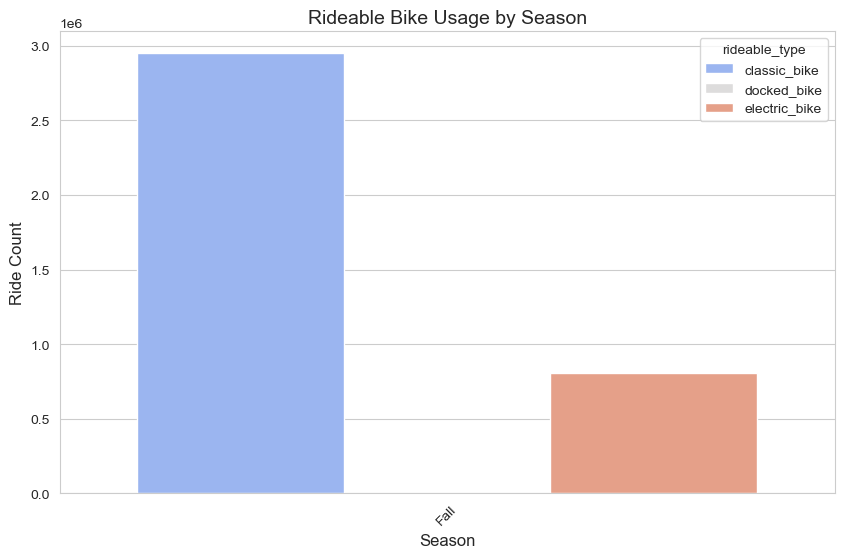

In [128]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=filtered_dc, x='Season', hue='rideable_type', palette='coolwarm', dodge=True)

# Add labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Ride Count", fontsize=12)
plt.title("Rideable Bike Usage by Season", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_61548/2231818162.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_dc, x='member_casual', palette='coolwarm')


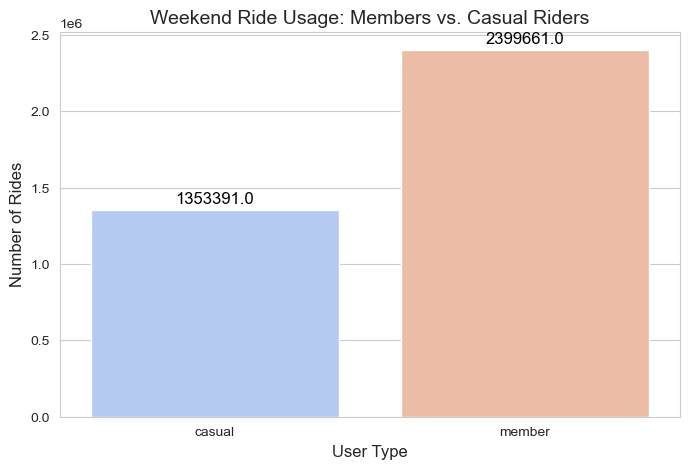

In [129]:
# Filter for weekend rides (Saturday=5, Sunday=6)
#weekend_rides = df[df['day_of_week'].isin([5, 6])]

# Set Seaborn style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_dc, x='member_casual', palette='coolwarm')

# Add labels and title
plt.xlabel("User Type", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Weekend Ride Usage: Members vs. Casual Riders", fontsize=14)

# Show the count on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_61548/2886188464.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_counts = filtered_dc.groupby(['time_of_day', 'member_casual']).size().reset_index(name='count')


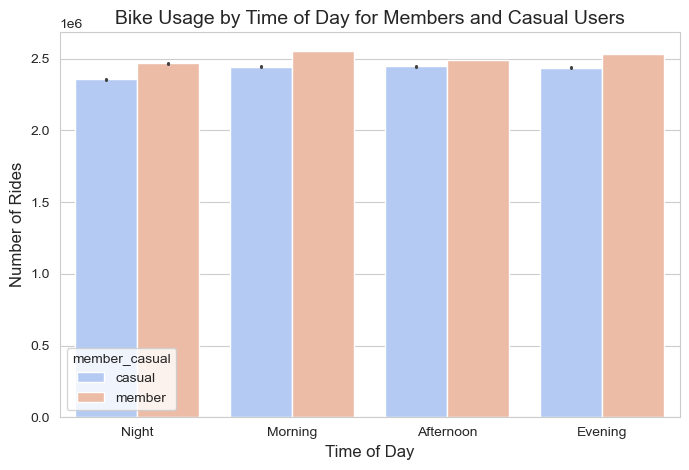

In [139]:
# Count rides by time of day and member type
time_counts = filtered_dc.groupby(['time_of_day', 'member_casual']).size().reset_index(name='count')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=filtered_dc, x='time_of_day', y='ride_count', hue='member_casual', palette='coolwarm')

# Add labels and title
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Bike Usage by Time of Day for Members and Casual Users", fontsize=14)

# Show the plot
plt.show()

/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_61548/473888403.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_counts = filtered_dc.groupby(['time_of_day', 'member_casual', 'rideable_type']).size().reset_index(name='count')
/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_61548/473888403.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = time_counts.pivot_table(index=['time_of_day', 'member_casual'], columns='rideable_type', values='count', fill_value=0)


ValueError: Unknown format code 'd' for object of type 'float'

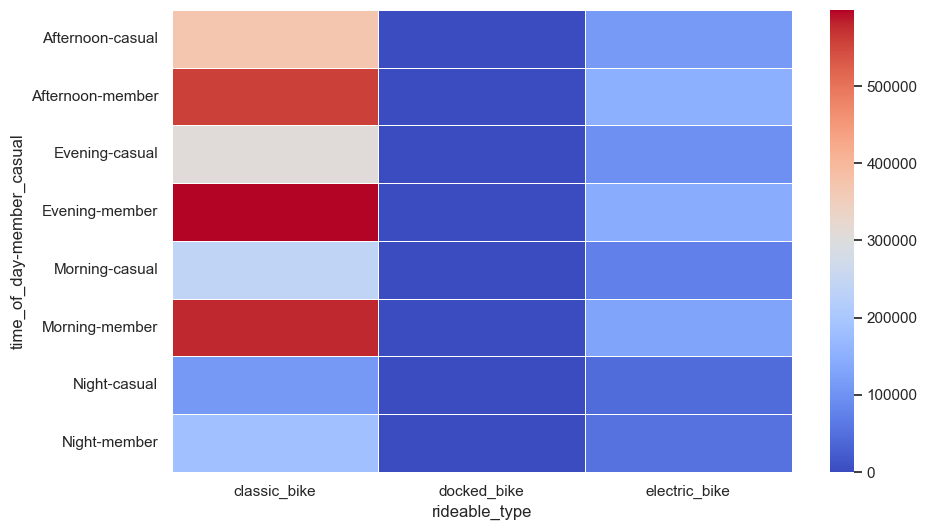

In [140]:
# Count rides by time of day, member type, and rideable bike type
time_counts = filtered_dc.groupby(['time_of_day', 'member_casual', 'rideable_type']).size().reset_index(name='count')

# Create a pivot table for heatmap
pivot_table = time_counts.pivot_table(index=['time_of_day', 'member_casual'], columns='rideable_type', values='count', fill_value=0)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=0.5, fmt="d")

# Add labels and title
plt.xlabel("Rideable Bike Type", fontsize=12)
plt.ylabel("Time of Day & User Type", fontsize=12)
plt.title("Heatmap of Bike Usage by Time of Day for Members and Casual Users", fontsize=14)

# Show the plot
plt.show()


In [ ]:
print("Hello there!")

: 